In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

In [52]:

srate = 10000
dt = 1/srate
t = np.arange(0, 1, dt*20)

# sine and cosine wav  
lpf = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t)
lpf2 = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t + np.pi/4)

# random noise 

noise1 = np.random.normal(0, 1, len(t))
noise2 = np.random.normal(0, 1, len(t)) 

X = lpf + noise1
Y = lpf2 + noise2

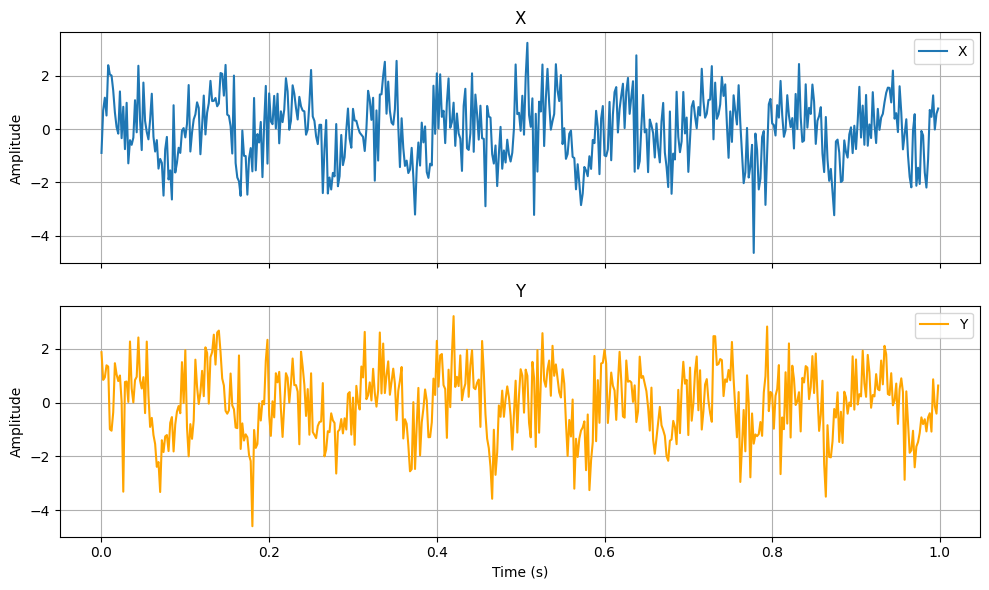

In [53]:

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(t, X, label='X')
axs[0].set_title('X')
axs[0].set_ylabel('Amplitude')
axs[0].grid()
axs[0].legend()

axs[1].plot(t, Y, label='Y', color='orange')
axs[1].set_title('Y')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

In [54]:
win = 10*srate #window size 
overlap = 0*win 

nfft = 10*srate 

#Estimate the cross power 
# spectral density, Pxy, using Welch's method.
C , F = sp.signal.csd(X, Y, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

# Estimate power spectral density using Welch's method.
Pxx, F2 = sp.signal.welch(X, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)


# Estimate power spectral density using a periodogram.
Pxx2 , F3 = sp.signal.periodogram(X, fs=srate, nfft=nfft) #detrand , return_onesided and scaling

# Estimate the magnitude squared coherence estimate, Cxy, of discrete-time signals X and Y using Welch's method.
Cxy , F4 = sp.signal.coherence(X, Y, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

f , t , Zxx = sp.signal.stft(X, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

# Provide a parametrized discrete Short-time Fourier transform (stft) and its inverse (istft).
# f, t, Zxx = sp.signal.ShortTimeFFT(X, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

/home/rafael19/anaconda3/envs/figas2/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 500, using nperseg = 500
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/rafael19/anaconda3/envs/figas2/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1240: UserWarning: nperseg = 100000 is greater than input length  = 500, using nperseg = 500
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,


/home/rafael19/anaconda3/envs/figas2/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/rafael19/anaconda3/envs/figas2/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 300.0)

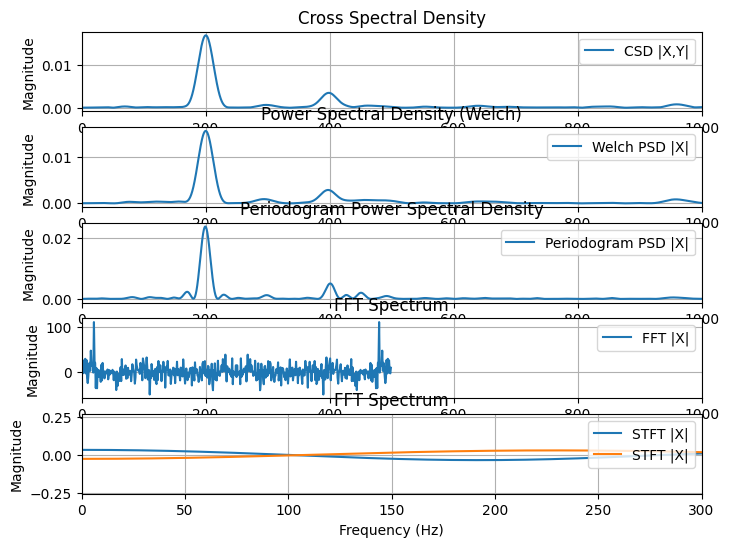

In [60]:
fig, ax = plt.subplots(5, 1, figsize=(8, 6))

ax[0].plot(C , np.abs(F), label='CSD |X,Y|')
ax[0].set_title('Cross Spectral Density')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
ax[0].set_xlim(0, 1000)
ax[0].legend()

ax[1].plot(Pxx , np.abs(F2), label='Welch PSD |X|')
ax[1].set_title('Power Spectral Density (Welch)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()
ax[1].legend()
ax[1].set_xlim(0, 1000)


ax[2].plot(Pxx2 , np.abs(F3), label='Periodogram PSD |X|')
ax[2].set_title('Periodogram Power Spectral Density')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].grid()
ax[2].legend()
ax[2].set_xlim(0, 1000)

fft = sp.fft.fft(X)
ax[3].plot(fft, label='FFT |X|')
ax[3].set_title('FFT Spectrum')
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[3].grid()
ax[3].legend()
ax[3].set_xlim(0, 1000)


ax[4].plot(Zxx , label='STFT |X|')
ax[4].set_title('FFT Spectrum')
ax[4].set_xlabel('Frequency (Hz)')
ax[4].set_ylabel('Magnitude')
ax[4].grid()
ax[4].legend()
ax[4].set_xlim(0, 300)

In [ ]:
#### Surrogados 
### Calcular pwelch
###  feito isso, aula 9 feita 

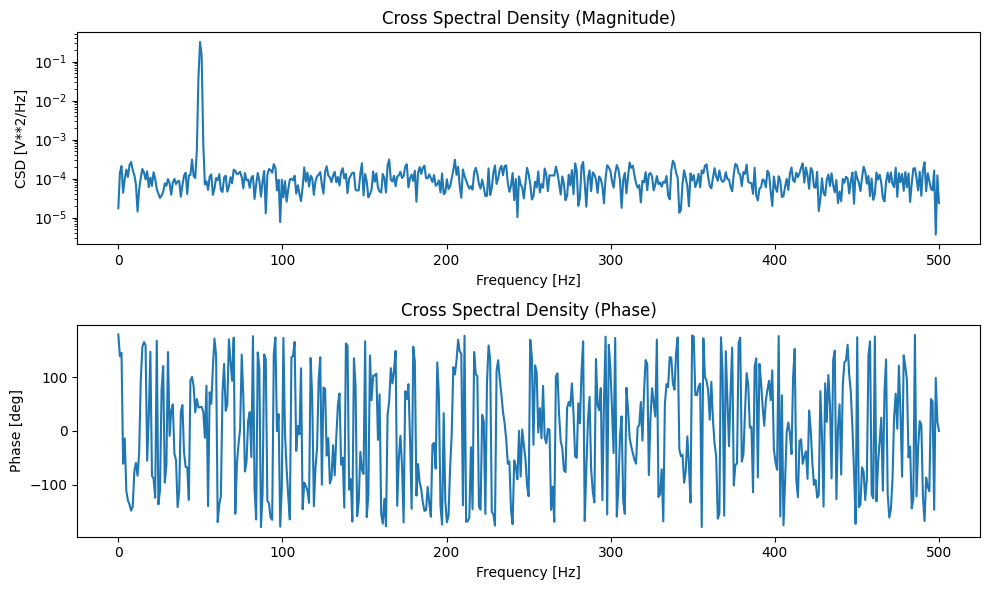

In [59]:
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)  # Time vector
x = np.sin(2*np.pi*50*t) + 0.5*np.random.randn(len(t))  # Signal 1 (50 Hz + noise)
y = np.sin(2*np.pi*50*t + np.pi/4) + 0.5*np.random.randn(len(t))  # Signal 2 (phase shifted)

# Compute cross spectral density
f, Pxy = sp.signal.csd(x, y, fs, nperseg=1024)

# Plot magnitude (in dB) and phase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Magnitude plot
ax1.semilogy(f, np.abs(Pxy))
ax1.set_title('Cross Spectral Density (Magnitude)')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('CSD [V**2/Hz]')

# Phase plot
ax2.plot(f, np.angle(Pxy, deg=True))
ax2.set_title('Cross Spectral Density (Phase)')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Phase [deg]')

plt.tight_layout()
plt.show()